The goal of this notebook to allow us to analyze the dataset and hopefully draw some interesting conclusions

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('../data/recomm_df_w_dummies.csv')

In [10]:
df.shape

(626, 325)

In [11]:
df.head(1)

,id,job_title,company_name,details,category,compensation,start,end,href,skills_.net,...,job_loc_trichy,job_loc_uluberia,job_loc_uttar dinajpur,job_loc_uttarkashi,job_loc_varanasi,job_loc_vijayapur,job_loc_vijayawada,job_loc_visakhapatnam,job_loc_west midnapore,job_loc_zirakpur
0,1,hr executive - recruitment,engenia technologies,we are seeking a hr recruiter w...,human resources recruiter,paid,2019-03-02,2019-08-28,http://letsintern.com/internship/Human-Resourc...,0,...,0,0,0,0,0,0,0,0,0,0


Some potential questions that can be answered with the data :

1. What are the most common types of category of internships ?
2. For each category of internship, find the area/state/city where the max no. of internships are offered.
3. What are the most in demand skills ? 
4. Which skills are most required for each category ?
5. Think of statistical tests that you can apply to this data as it is a sample.

### 1. What are the most common types of category of internships ?

The categories we are dividing the data into are : 

hr, management, it, finance, marketing_sales, engineering, customer_service, design, social_work, teaching, air_related, research and business_related 

In [55]:
def get_cat_items(cat, df = df):
    '''
    returns a dataframe that has the internships related to that category
    '''
    # making some common job categories
    # these are extremely broad categories. I am pretty sure that I am missing some categories
    # these categoires have been derived/picked up from letsintern's landing page as we had picked up the data from there

    # defining some rules to put items into categories
    if cat == 'management':
        return df[df.category.str.contains('manag')]
    if cat == 'hr':
        return df[df.category.str.contains('human|scout')]
    if cat == 'it':
        return df[df.category.str.contains('it |computer|information tech|developer|software')]
    if cat == 'finance':
        return df[df.category.str.contains('account|bank|financ')]
    if cat == 'marketing_sales':
        return df[df.category.str.contains('market|social media|sale|brand|seo|google analytic|content')]
    if cat == 'engineering':
        return df[df.category.str.contains('engineer')]
    if cat == 'customer_service':
        return df[df.category.str.contains('customer')]
    if cat == 'design':
        return df[df.category.str.contains('design| art |graphic')]
    if cat == 'social_work':
        return df[df.category.str.contains('social work|ngo|n.g.o')]
    if cat == 'teaching':
        return df[df.category.str.contains('teach')]
    if cat == 'air_related':
        return df[df.category.str.contains('air|plane|pilot|hostess')]
    if cat == 'research':
        return df[df.category.str.contains('research')]
    if cat == 'business_related':
        return df[df.category.str.contains('business')]


In [60]:
# plotting the different categories
cats = 'hr,management,it,finance,marketing_sales,engineering,customer_service,design,social_work,teaching,\
air_related,research,business_related'.split(',')

In [69]:
len_cats = [get_cat_items(i).shape[0] for i in cats]
percent_cats = [i/sum(len_cats) for i in len_cats]

<BarContainer object of 13 artists>

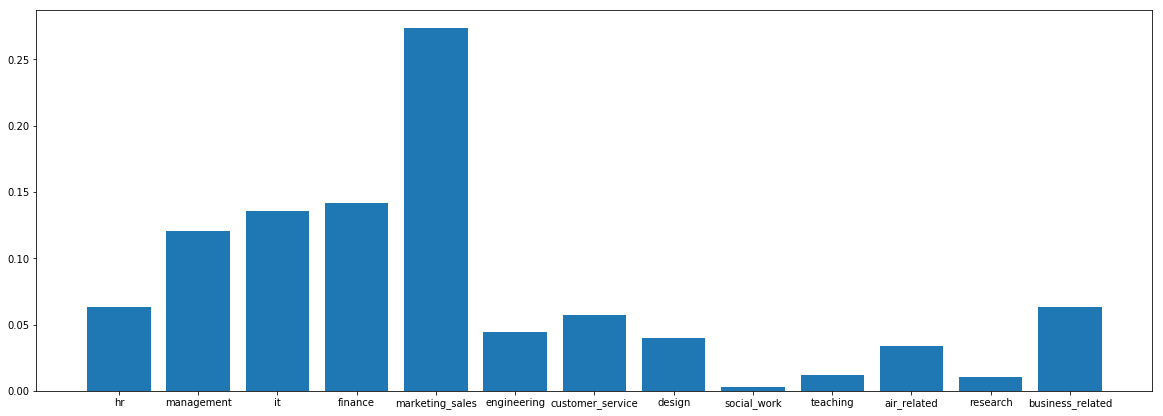

In [70]:
plt.figure(figsize = (20,7))
plt.bar(x = cats, height = percent_cats)

Markteting and sales managed to top the list which was a little obvious since there were both sales and marketing internships mixed in this category. But even then, the percentage is just a little less of the double of that of finance. Finance came in 2nd which I orginally thought would be occupied by IT as thats a huge sector with a lot of internship openings usually. IT came in 3rd followed by management.

Its sad to see that the number of internships for social work was really low, the lowest among all categories. It is possible that some may have been missed out due to lack of keywords used to identify social work internships, but even given that, the number is pretty small.

### 2. For each category of internship, find the area/state/city where the max no. of that category's internships are offered for.

In [95]:
# the top 2 places where interships for each category are max have been listed below
for i in cats:
    # df for a particular category is returned
    df_temp = get_cat_items(i)
    # top 2 places are selected by taking the sum of values under the 'job location' columns
    top_2 = df_temp[df_temp.columns[df_temp.columns.str.contains('job_loc')]].sum(axis = 0).sort_values(ascending = False).head(2).index.tolist()
    # 'job_loc' is removed from all entries for clean results
    top_2 = [i[8:] for i in top_2]
    print(i)
    print(top_2)
    print('------')

hr
['anywhere in india', 'kolkata']
------
management
['mumbai', 'bangalore']
------
it
['bangalore', 'anywhere in india']
------
finance
['kolkata', 'howrah']
------
marketing_sales
['mumbai', 'bangalore']
------
engineering
['delhi', 'chennai']
------
customer_service
['kolkata', 'delhi']
------
design
['bangalore', 'anywhere in india']
------
social_work
['mumbai', 'hyderabad']
------
teaching
['anywhere in india', 'ahmedabad']
------
air_related
['kolkata', 'bhubaneswar']
------
research
['mumbai', 'chennai']
------
business_related
['mumbai', 'bangalore']
------


In [96]:
# maximum internships openings are in ? 
df[df.columns[df.columns.str.contains('job_loc')]].sum(axis = 0).sort_values(ascending = False).head(5)

job_loc_kolkata              120
job_loc_bangalore            111
job_loc_mumbai                97
job_loc_delhi                 87
job_loc_anywhere in india     86
dtype: int64

### 3. What are the most in demand skills ? 

In [130]:
df.iloc[:,df.columns.str.contains('skills')].sum(axis = 0).sort_values(ascending = False).head(5)

skills_analytical skills    142
skills_marketing             65
skills_accounting            52
skills_agreeableness         49
skills_writing skills        45
dtype: int64

### 4. Which skills are most required for each category ?

In [138]:
for i in cats:
    # df for a particular category is returned
    df_temp = get_cat_items(i)
    # top 2 places are selected by taking the sum of values under the 'job location' columns
    top_3 = df_temp.iloc[:,df_temp.columns.str.contains('skills')].sum(axis = 0).sort_values(ascending = False).head(3).index.tolist()
    # 'job_loc' is removed from all entries for clean results
    top_3 = [i[7:] for i in top_3]
    print(i)
    print(top_3)
    print('------')

hr
['analytical skills', 'no skills preferred', 'human resource practices']
------
management
['writing skills', 'analytical skills', 'marketing']
------
it
['php', 'javascript', 'html']
------
finance
['accounting', 'analytical skills', 'computer literacy']
------
marketing_sales
['marketing', 'analytical skills', 'digital marketing']
------
engineering
['mechanical engineering', 'electrical engineering', 'production and industrial engineering']
------
customer_service
['customer service situation handling', 'agreeableness', 'customer expectation management']
------
design
['photoshop', 'illustrator', 'design patterns']
------
social_work
['agreeableness', 'leadership skills', 'written english']
------
teaching
['analytical skills', 'spoken english comprehension', 'english comprehension']
------
air_related
['english comprehension', 'analytical skills', 'customer expectation management']
------
research
['analytical skills', 'internet ability', 'ms office']
------
business_related
['a